In [1]:
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
dataframe = pandas.read_excel("usd_rate.xlsx")
rate = dataframe.curs

In [3]:
past = 28 # Для обучения будем брать данные за 20 дней из прошлого
# Будем пытаться на их основе спрогнозировать курс на завтра

In [4]:
def models(model, x_train, y_train):
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    plt.plot(prediction, label="Prediction")
    plt.plot(list(y_test), label="Real")
    plt.legend()
    mae = mean_absolute_error(prediction, y_test)
    print(f"MAE = {mae}")
    

In [5]:
length = len(rate)
count = length - past

In [6]:
past_days = []

In [7]:
current_day = []

In [8]:
for day in range(past, length):
    slc_x = list(rate[(day-past):day])
    past_days.append(slc_x) # rate[4:33]
    slc_y = rate[day]
    current_day.append(slc_y) # rate[33]

In [9]:
past_columns = []

In [10]:
for i in range(past):
    past_columns.append(f"past_{i}")

In [11]:
x = pandas.DataFrame(data=past_days, columns=past_columns)
# То, на основе чего мы делаем предсказание

In [12]:
y = pandas.Series(current_day, name='target')
# То, что мы пытаемся предсказать

In [13]:
# Обучающая выборка, "Учебник"
x_train = x[:-10]
y_train = y[:-10]

In [14]:
# Тестовая выборка, "Экзамен"
x_test = x[-10:]
y_test = y[-10:]

      past_0   past_1   past_2   past_3   past_4   past_5   past_6   past_7  \
700  68.6745  68.6183  69.1219  70.3950  69.7524  69.4822  69.6180  69.5725   
701  68.6183  69.1219  70.3950  69.7524  69.4822  69.6180  69.5725  69.4835   
702  69.1219  70.3950  69.7524  69.4822  69.6180  69.5725  69.4835  68.8376   
703  70.3950  69.7524  69.4822  69.6180  69.5725  69.4835  68.8376  68.8376   
704  69.7524  69.4822  69.6180  69.5725  69.4835  68.8376  68.8376  69.4660   
705  69.4822  69.6180  69.5725  69.4835  68.8376  68.8376  69.4660  69.1284   
706  69.6180  69.5725  69.4835  68.8376  68.8376  69.4660  69.1284  69.9513   
707  69.5725  69.4835  68.8376  68.8376  69.4660  69.1284  69.9513  70.4413   
708  69.4835  68.8376  68.8376  69.4660  69.1284  69.9513  70.4413  70.4413   
709  68.8376  68.8376  69.4660  69.1284  69.9513  70.4413  70.4413  70.5198   

      past_8   past_9  ...  past_18  past_19  past_20  past_21  past_22  \
700  69.4835  68.8376  ...  71.3409  72.1719  71.2379  

In [15]:
model = LinearRegression()
# Модель линейной регрессии

MAE = 0.41596322379622847


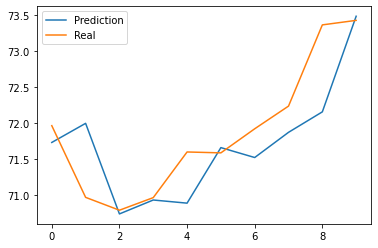

In [16]:
models(model, x_train, y_train)

In [17]:
model = MLPRegressor(hidden_layer_sizes = (100,))
# Модель MLPRegressor

/home/kod-exe/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE = 0.8312957491068034


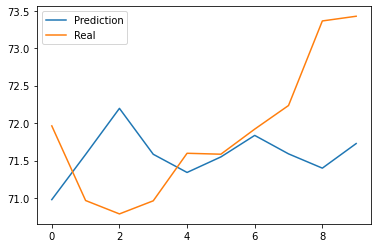

In [18]:
models(model, x_train, y_train)

In [19]:
model = GradientBoostingRegressor(learning_rate=0.3)
# модель GradientBoostingRegressor

MAE = 0.4692315407727733


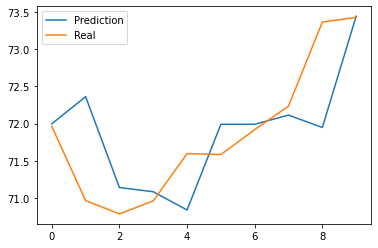

In [20]:
models(model, x_train, y_train)

In [21]:
model = BaggingRegressor(max_samples = 0.5)
# модель BaggingRegressor

MAE = 0.47580600000000006


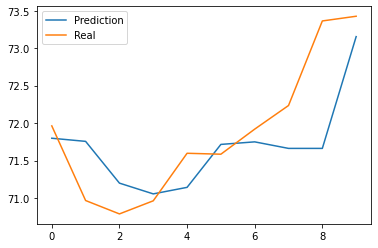

In [22]:
models(model, x_train, y_train)

In [23]:
model = AdaBoostRegressor(n_estimators = 60)
# модель

MAE = 0.5402492691001853


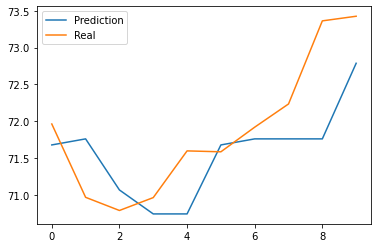

In [24]:
models(model, x_train, y_train)

In [25]:
#вывод:

#В данном интенсиве мы научились выполнять предсказание курса доллара с использованием различных моделей.
#Изменение параметров модели позваляет добится лучшего прогнозирования.
#В MLPRegressor это относится к параметру количество нейронов в i-м скрытом слое(hidden_layer_sizes).
#В GradientBoostingRegressor - learning_rate.
#В BaggingRegressor - max_samples.
#В AdaBoostRegressor - n_estimators.
#Самыми эффективными модельями с точки зрения точности оценивания оказались LinearRegression и GradientBoostingRegressor.
#Модель LinearRegression выдовала ошибку в 40-49 копеек.
#Модель MLPRegressor выдовала ошибку в 49-80 копеек.
#Модель GradientBoostingRegressor выдовала ошибку в 51-73 копеек.
#Модель BaggingRegressor выдовала ошибку в 49-79 копеек. 
#Модель MLPRegressor выдовала ошибку в 51-80 копеек.
#при изменении количества дней для предсказаний качество оценки изменяется для различных моделей не одинаково.
#различные модели имеют разные выборки обучения.